In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
plt.style.use('seaborn-white')

In [3]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
LARGE_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=LARGE_SIZE)     
plt.rc('axes', titlesize=MEDIUM_SIZE)    
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('axes', linewidth=0.5) 
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=MEDIUM_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE, dpi=300, figsize=(5,4) )  

In [4]:
path_to_data="../data/"
path_to_results="../results/"

In [9]:
plt_df=pd.read_csv(path_to_data+"Data_for_Fig4A.tsv",sep="\t",index_col=0)
plt_df.head()

,CancerType,Gender_sTP53m,GS_cases,HA_cases,GS_HA_anno,Cancer_order,BRCA1_alteration,BRCA2_alteration,ATM_alteration,RAD51B_alteration,...,RAD51D_alteration,RAD50_alteration,BLM_alteration,CHEK1_alteration,FANCL_alteration,RAD51_alteration,FANCI_alteration,FANCF_alteration,NBN_alteration,RAD52_alteration
TCGA-04-1336,OV,Female_TP53m,1.0,1.0,GS_HA,0,0,0,4,4,...,4,4,4,4,4,4,4,4,4,4
TCGA-25-2401,OV,Female_TP53m,1.0,1.0,GS_HA,0,0,3,4,4,...,4,4,4,4,4,4,4,4,4,4
TCGA-25-2392,OV,Female_TP53m,1.0,1.0,GS_HA,0,0,4,4,4,...,4,4,4,4,4,4,4,4,4,4
TCGA-09-2051,OV,Female_TP53m,1.0,1.0,GS_HA,0,0,4,4,4,...,4,4,4,4,4,4,4,4,4,4
TCGA-10-0931,OV,Female_TP53m,1.0,1.0,GS_HA,0,0,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [10]:
col_order=plt_df.columns[plt_df.columns.str.contains("_alteration$")]
col_order

Index(['BRCA1_alteration', 'BRCA2_alteration', 'ATM_alteration',
       'RAD51B_alteration', 'CDK12_alteration', 'CHEK2_alteration',
       'BRIP1_alteration', 'PALB2_alteration', 'FANCD2_alteration',
       'FANCC_alteration', 'RAD51C_alteration', 'ATR_alteration',
       'BARD1_alteration', 'FANCA_alteration', 'FANCM_alteration',
       'MRE11A_alteration', 'RAD51D_alteration', 'RAD50_alteration',
       'BLM_alteration', 'CHEK1_alteration', 'FANCL_alteration',
       'RAD51_alteration', 'FANCI_alteration', 'FANCF_alteration',
       'NBN_alteration', 'RAD52_alteration'],
      dtype='object')

In [11]:
from collections import Counter
hrd_cases=plt_df[(plt_df["GS_cases"]==1) | (plt_df["HA_cases"]==1)]
cancer_names=list(plt_df["CancerType"].unique())
cancer_names_order=[ x[0] for x in  Counter(hrd_cases["CancerType"]).most_common() ]
dict_cancer_names_order={v:k for k,v in enumerate(cancer_names_order)}
dict_cancer_names_order

{'OV': 0,
 'BRC': 1,
 'STES': 2,
 'LUSC': 3,
 'PRAD': 4,
 'BLCA': 5,
 'SARC': 6,
 'HNSC': 7,
 'TGCT': 8,
 'LIHC': 9,
 'LUAD': 10,
 'SKCM': 11,
 'UCEC': 12,
 'MESO': 13,
 'CRC': 14,
 'CESC': 15,
 'KRC': 16,
 'ACC': 17,
 'PAAD': 18,
 'GBM': 19,
 'CHOL': 20,
 'UCS': 21,
 'LGG': 22,
 'PCPG': 23,
 'THCA': 24}

In [13]:
groups=['Female_TP53m', 'Male_TP53m', 'Female_TP53wt', 'Male_TP53wt']
labels=['Female TP53m', 'Male TP53m', 'Female TP53wt', 'Male TP53wt']

In [14]:
dict_cancer_counts_4groups={}

for cancer in cancer_names:
    counts=[]
    tmp_df=hrd_cases[hrd_cases["CancerType"]==cancer]
    for group in groups:
        tmp_df2=tmp_df[ tmp_df["Gender_sTP53m"]==group]
        add=  len(tmp_df2) 
        counts.append(add)
    dict_cancer_counts_4groups[cancer]=counts
    
dict_cancer_counts_4groups

{'OV': [187, 0, 18, 0],
 'BRC': [99, 0, 90, 6],
 'STES': [3, 56, 9, 40],
 'UCEC': [20, 0, 10, 0],
 'CRC': [1, 8, 4, 3],
 'LUSC': [5, 47, 2, 17],
 'BLCA': [4, 20, 7, 29],
 'SKCM': [1, 4, 10, 20],
 'CESC': [2, 0, 13, 0],
 'SARC': [8, 6, 19, 21],
 'HNSC': [1, 28, 0, 20],
 'TGCT': [0, 0, 0, 47],
 'LGG': [1, 2, 0, 1],
 'THCA': [0, 0, 2, 0],
 'PAAD': [0, 2, 1, 6],
 'PRAD': [0, 1, 0, 60],
 'LUAD': [2, 2, 14, 19],
 'GBM': [1, 3, 0, 5],
 'LIHC': [0, 8, 11, 26],
 'ACC': [1, 0, 8, 3],
 'MESO': [0, 0, 4, 20],
 'KRC': [0, 0, 4, 10],
 'CHOL': [0, 0, 3, 3],
 'UCS': [5, 0, 1, 0],
 'PCPG': [0, 0, 3, 1]}

In [15]:
dict_number_color={0:"red",1:"blue",2:"green",3:"y",4:"whitesmoke"}

BRCA1
BRCA2
ATM
RAD51B
CDK12
CHEK2
BRIP1
PALB2
FANCD2
FANCC
RAD51C
ATR
BARD1
FANCA
FANCM
MRE11A
RAD51D
RAD50
BLM
CHEK1
FANCL
RAD51
FANCI
FANCF
NBN
RAD52


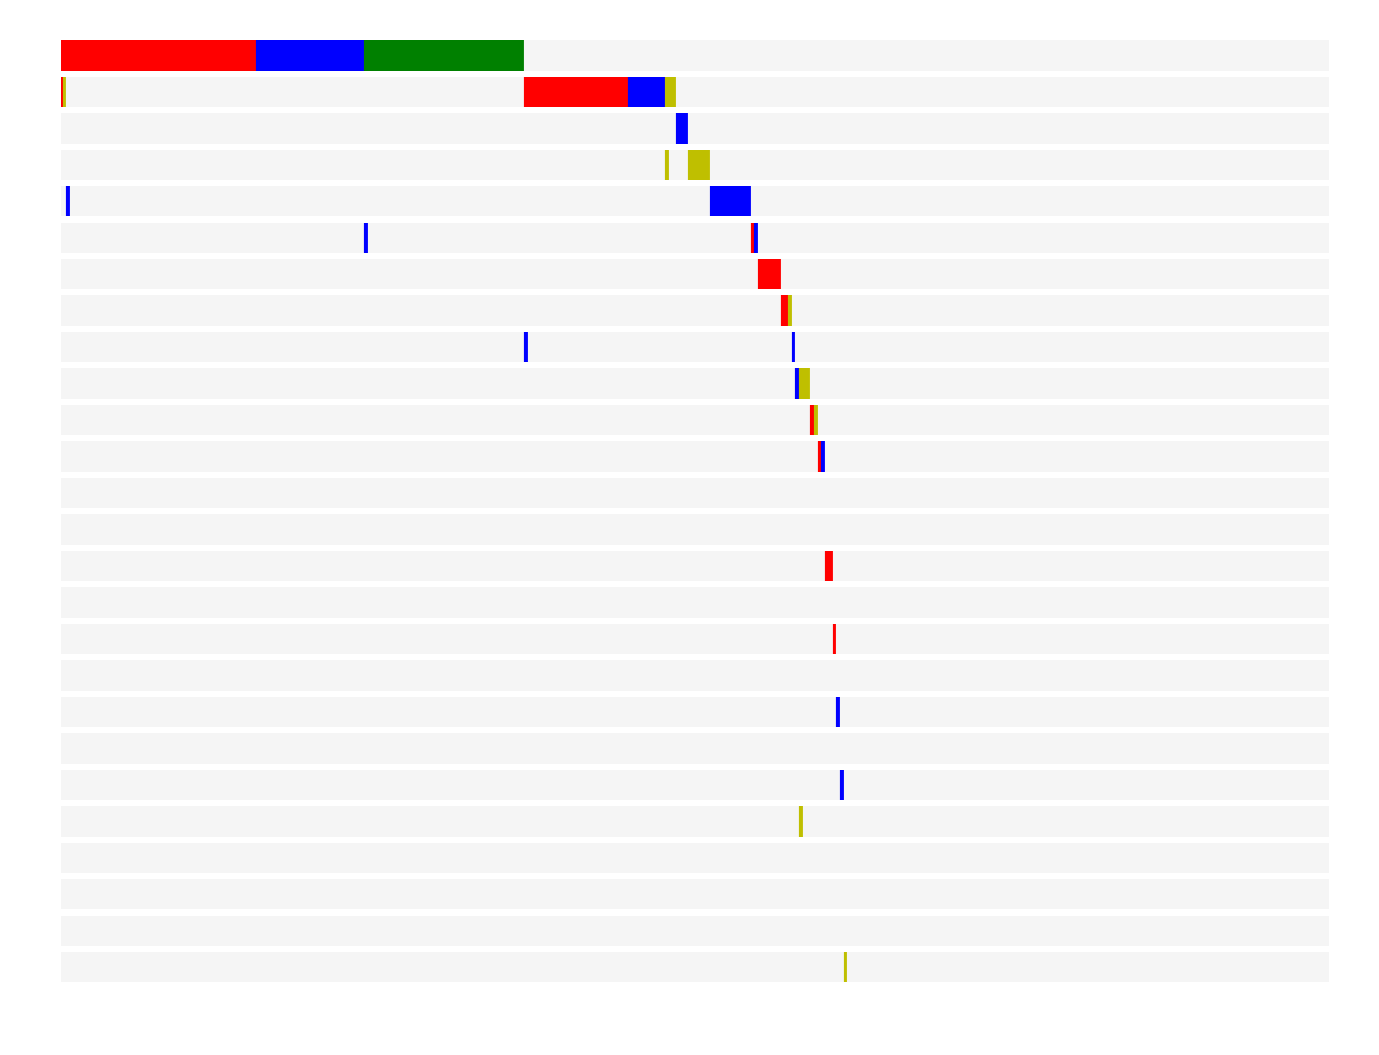

In [16]:
from matplotlib import patches

tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[0]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    
    print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_1_1.png",bbox_incehs="tight")

In [17]:
dict_cancer_color={
'ACC': (0.807843137254902, 0.42745098039215684, 0.7411764705882353),
 'BLCA': (0.3215686274509804, 0.32941176470588235, 0.6392156862745098),
 'BRC': (0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 'CESC': (0.4196078431372549, 0.43137254901960786, 0.8117647058823529),
 'CHOL': (0.2235294117647059, 0.23137254901960785, 0.4745098039215686),
 'CRC': (0.38823529411764707, 0.4745098039215686, 0.2235294117647059),
 'ESCA': (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 'GBM': (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 'HNSC': (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 'KRC': (1.0, 1.0, 0.6),
 'LGG': (0.8705882352941177, 0.6196078431372549, 0.8392156862745098),
 'LIHC': (0.5176470588235295, 0.23529411764705882, 0.2235294117647059),
 'LUAD': (0.6784313725490196, 0.28627450980392155, 0.2901960784313726),
 'LUSC': (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),
 'MESO': (0.9058823529411765, 0.5882352941176471, 0.611764705882353),
 'OV': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'PAAD': (0.4823529411764706, 0.2549019607843137, 0.45098039215686275),
 'PCPG': (0.6470588235294118, 0.3176470588235294, 0.5803921568627451),
 'PRAD': (0.611764705882353, 0.6196078431372549, 0.8705882352941177),
 'SARC': (0.7411764705882353, 0.6196078431372549, 0.2235294117647059),
 'SKCM': (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 'STES': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'TGCT': (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 'THCA': (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 'UCEC': (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 'UCS': (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 'UVM': (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
'Others': 'grey'}

GS_cases
CancerType


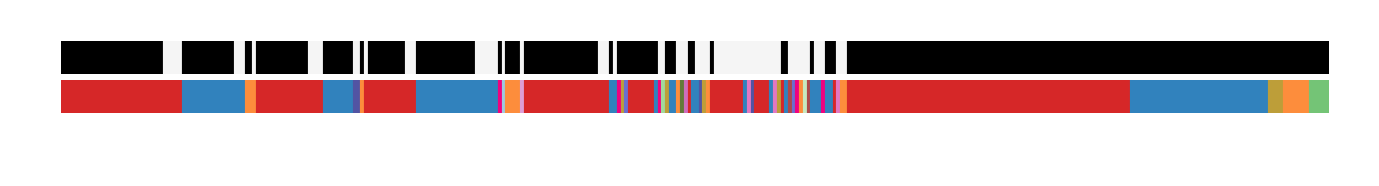

In [18]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()
    print(col)

plt.savefig(path_to_results+"Figure4A_1_2.png",bbox_incehs="tight")

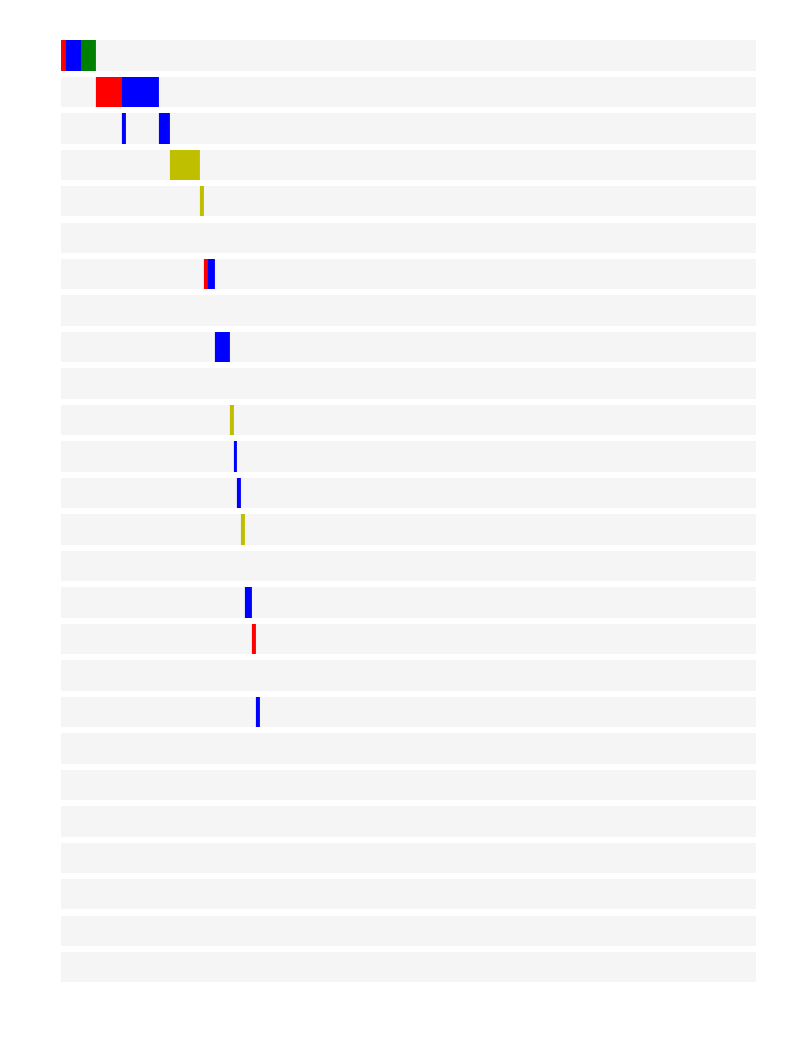

In [19]:
tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[1]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    #print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_2_1.png",bbox_incehs="tight")

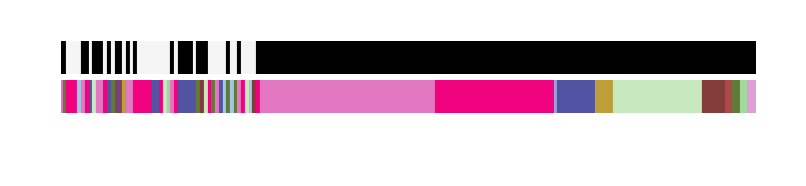

In [20]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()

plt.savefig(path_to_results+"Figure4A_2_2.png",bbox_incehs="tight")

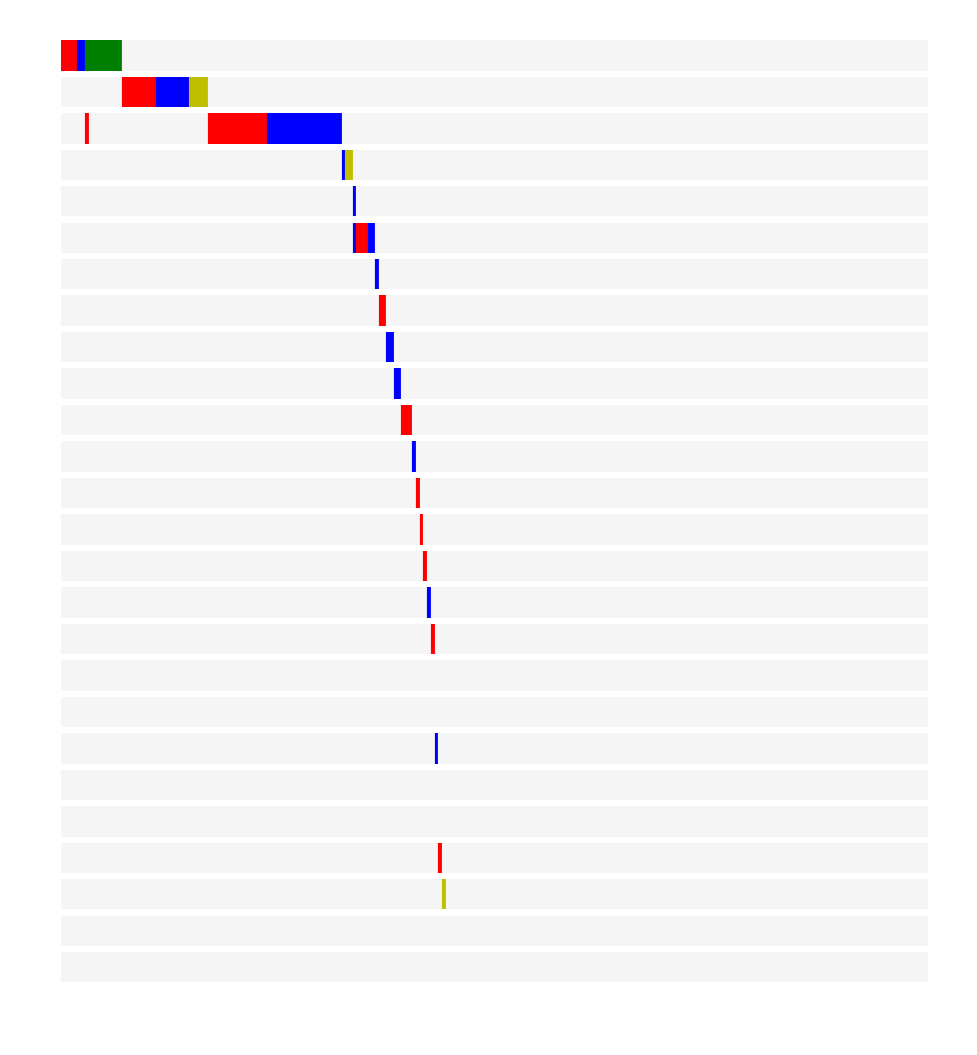

In [21]:
tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[2]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    #print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_3_1.png",bbox_incehs="tight")

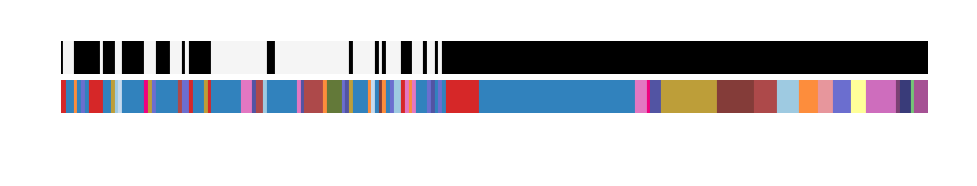

In [22]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()

plt.savefig(path_to_results+"Figure4A_3_2.png",bbox_incehs="tight")

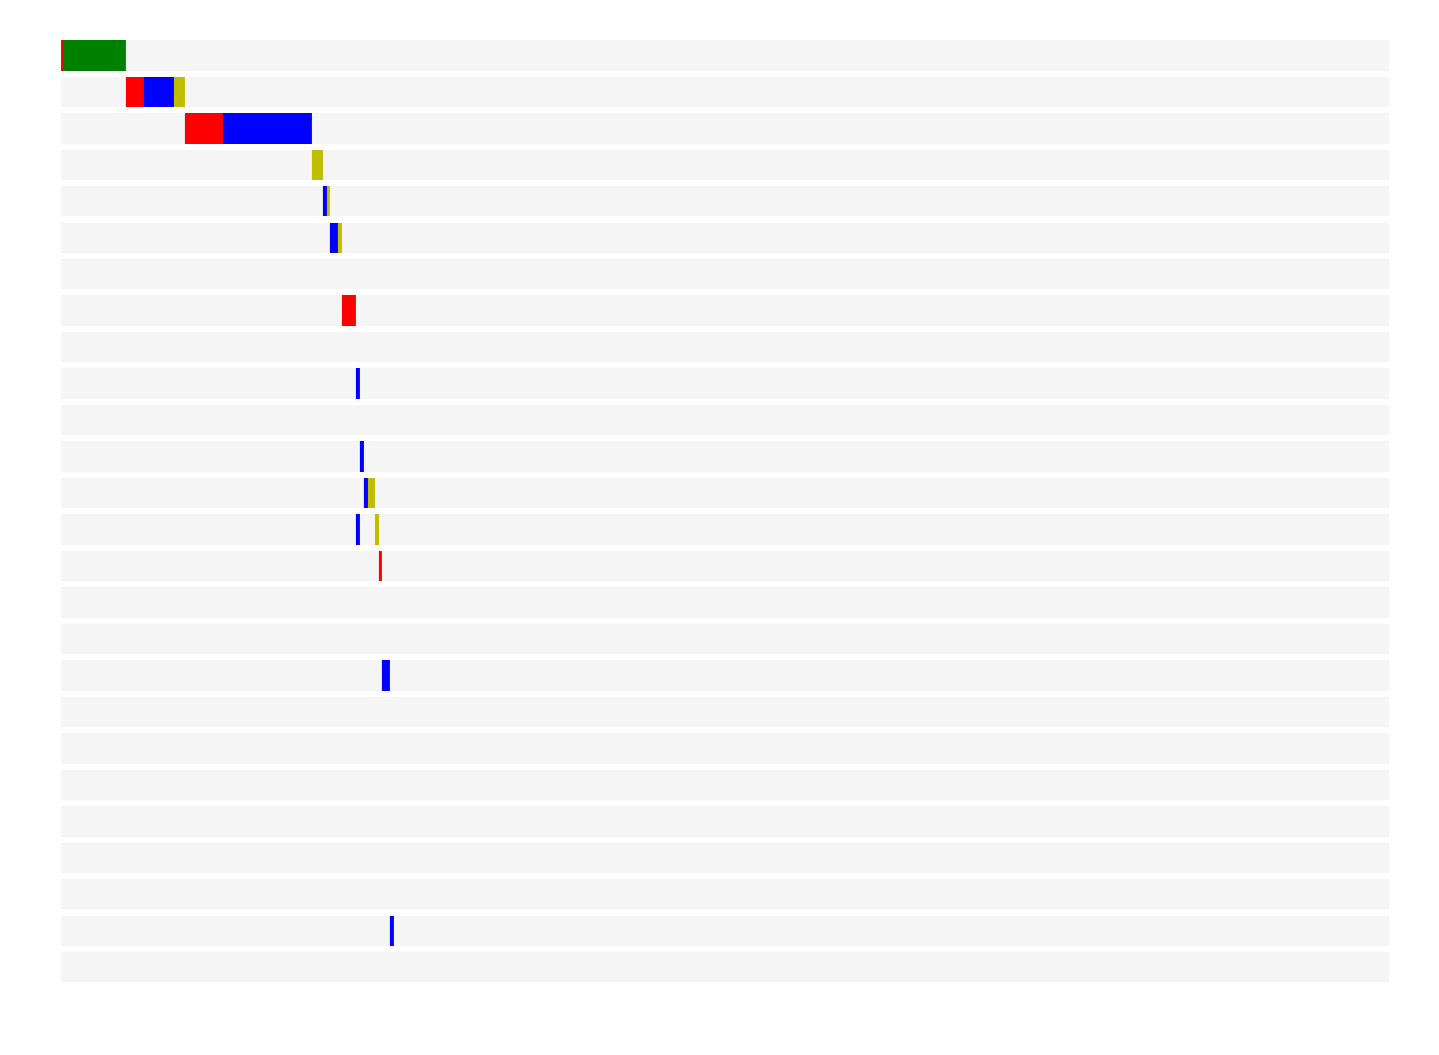

In [23]:
tmp_df=plt_df[plt_df["Gender_sTP53m"]==groups[3]]
N=len( tmp_df.index )
M=len( col_order )
fig = plt.figure(figsize=(0.016*N,0.16*M))
for i,col in enumerate(col_order ):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    for i,number in enumerate( tmp_df[col] ):
        r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_number_color[number])
        ax.add_patch(r)
    ax.set_axis_off()
    #print(col.replace("_alteration",""))

plt.savefig(path_to_results+"Figure4A_4_1.png",bbox_incehs="tight")

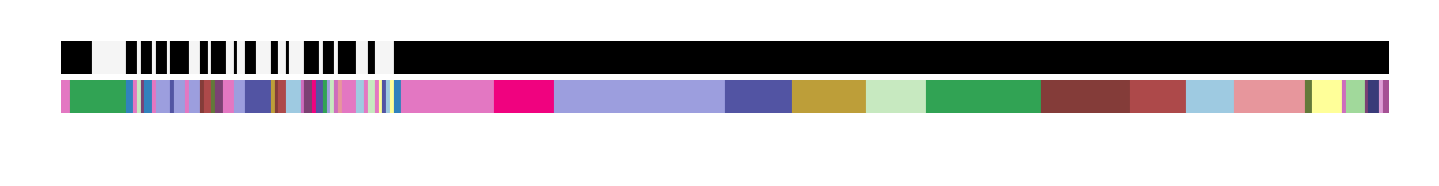

In [24]:
col_extra= ["GS_cases","CancerType"] 
N=len( tmp_df.index )
M=len(col_extra)
fig = plt.figure(figsize=(N*0.016,0.16*M))
for i,col in enumerate(col_extra):
    ax = fig.add_subplot(M,1,i+1)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if col=="CancerType":
        for i,cancer in enumerate( tmp_df[col] ):
            r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color=dict_cancer_color[cancer] ) 
            ax.add_patch(r)
    elif col=="GS_cases":
        for i,number in enumerate( tmp_df[col] ):
            if number==1:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="k") 
                ax.add_patch(r)
            else:
                r=patches.Rectangle(xy=(i/N,0),width=1/N,height=1,color="whitesmoke") 
                ax.add_patch(r)
    ax.set_axis_off()

plt.savefig(path_to_results+"Figure4A_4_2.png",bbox_incehs="tight")